In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [4]:
birds = pd.read_csv('JustinCase.csv')
birds["order_lat"] = birds["order_lat"].apply(lambda x: x[0]+x[1:].lower())
birds["species"] = birds["species"].apply(lambda x: x.replace(' ', '_').replace("\'", ""))
birds["family_eng"] = birds["family_eng"].apply(lambda x: x.replace(' ', '_').replace("\'", "").replace("&", "and"))
birds = birds.sort_values("species")
birds = birds[["species","order_lat","family_lat","family_eng","num_pics"]]

In [5]:
orders = pd.DataFrame(birds.groupby("order_lat").count()["species"])
orders = orders.join(birds.groupby("order_lat").sum()["num_pics"])
orders["pics_per_species"] = orders["num_pics"]/orders["species"]
families = pd.DataFrame(birds.groupby("family_eng").count()["species"])
families = families.join(birds.groupby("family_eng").sum()["num_pics"])
families["pics_per_species"] = families["num_pics"]/families["species"]

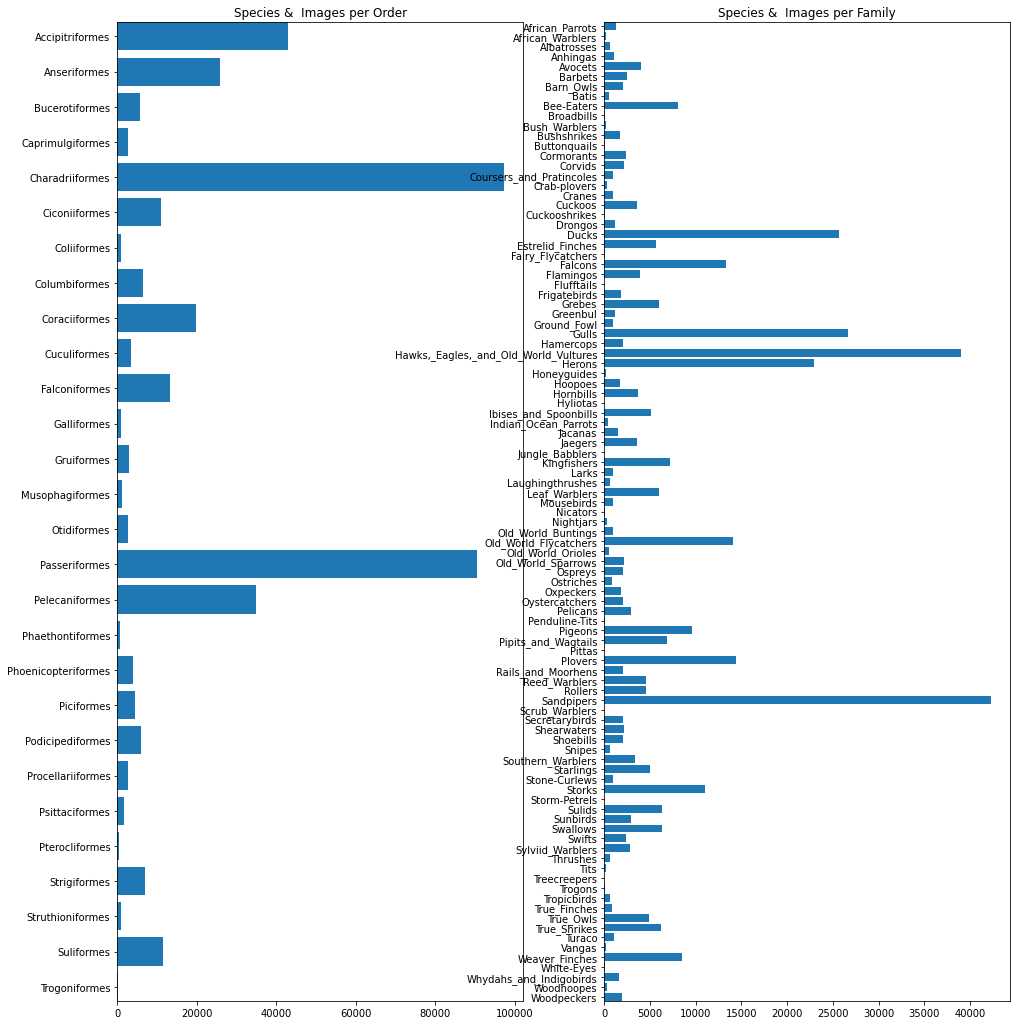

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(16,18))
for x, c in zip(ax, [(orders,"Order"),(families,"Family")]):
    x.set_title("Species &  Images per "+c[1])
    x.barh(c[0].index, c[0]["num_pics"])
    x.invert_yaxis()
    x.margins(y=0)
    
#fig.savefig("/content/gdrive/group_pic_counts.png")

In [6]:
#by_ species by_famly, by_order, rump
by_species = list(birds[birds["num_pics"] >= 200]["species"])
fam = birds[~birds["species"].isin(by_species)].groupby("family_eng").sum()
fam = fam[fam["num_pics"] >= 200].index
by_family = birds[(~birds["species"].isin(by_species)) & (birds["family_eng"].isin(fam))]["species"]
ordr = birds[(~birds["species"].isin(by_species)) & (~birds["species"].isin(by_family))]
ordr = ordr.groupby("order_lat").sum()
ordr = ordr[ordr["num_pics"] >= 200].index
by_order = birds[(~birds["species"].isin(by_species)) & (~birds["species"].isin(by_family)) & (birds["order_lat"].isin(ordr))]["species"]
rump = birds[(~birds["species"].isin(by_species)) & (~birds["species"].isin(by_family)) & (~birds["species"].isin(by_order))]["species"]
#by_species, by_family, by_order, rump

In [13]:
birds

,species,order_lat,family_lat,family_eng,num_pics
0,Abbotts_Starling,Passeriformes,Sturnidae,Starlings,2
1,Abdims_Stork,Ciconiiformes,Ciconiidae,Storks,0
2,Abyssinian_Crimsonwing,Passeriformes,Estrildidae,Estrelid_Finches,7
3,Abyssinian_Ground-Thrush,Passeriformes,Turdidae,Thrushes,10
4,Abyssinian_Nightjar,Caprimulgiformes,Caprimulgidae,Nightjars,7
...,...,...,...,...,...
1143,Yellow_Longbill,Passeriformes,Macrosphenidae,African_Warblers,0
1144,Zanzibar_Boubou,Passeriformes,Malaconotidae,Bushshrikes,0
1145,Zanzibar_Red_Bishop,Passeriformes,Ploceidae,Weaver_Finches,9
1146,Zebra_Waxbill,Passeriformes,Estrildidae,Estrelid_Finches,36


In [7]:
labels = list(by_species) + list(fam) + list(ordr) + ["Rump"]

In [7]:
#pd.Series(labels).to_csv("/content/gdrive/labellist.csv")
os.system("mkdir imd")
for label in labels:
    os.system("mkdir imd/"+label)

In [8]:
# one pulling/organizing loop 4 by_species
for species in by_species:
    num_pics = birds[birds["species"] == species]["num_pics"].values
    for pic in range(200):
        try:
            filename = species+str(pic)
            os.system("aws s3 cp s3://cap-3-tz-s3/"+filename+" imd/"+species+"/"+filename+".jpg")
        except:
            print(filename, "Uh oh!")
    print(species, pic)

In [17]:
# second for fam
for species in by_family:
    num_pics = birds[birds["species"] == species]["num_pics"].values[0]
    label = birds[birds["species"] == species]["family_eng"].values[0]
    for pic in range(num_pics):
        try:
            filename = species+str(pic)
            os.system("aws s3 cp s3://cap-3-tz-s3/"+filename+" imd/"+label+"/"+filename+".jpg")
        except:
            print(filename, "Oh my!")
    print(label, pic)

In [18]:
for species in by_order:
    num_pics = birds[birds["species"] == species]["num_pics"].values[0]
    label = birds[birds["species"] == species]["order_lat"].values[0]
    print(label)
    for pic in range(num_pics):
        try:
            filename = species+str(pic)
            os.system("aws s3 cp s3://cap-3-tz-s3/"+filename+" imd/"+label+"/"+filename+".jpg")
        except:
            print(filename, "Oh no!")
    print(label, pic)

for species in rump:
    num_pics = birds[birds["species"] == species]["num_pics"].values[0]
    print(num_pics)
    for pic in range(num_pics):
        try:
            filename = species+str(pic)
            os.system("aws s3 cp s3://cap-3-tz-s3/"+filename+" imd/Rump/"+filename+".jpg")
        except:
            print(filename, "Oops")
    print("Rump", species, pic)

  ####  SHUFFLE DIRECTORIES???

Passeriformes
Passeriformes 69
Passeriformes
Passeriformes 41
Passeriformes
Passeriformes 39
Passeriformes
Passeriformes 7
Passeriformes
Passeriformes 74
Passeriformes
Passeriformes 16
Passeriformes
Passeriformes 2
Passeriformes
Passeriformes 13
Charadriiformes
Charadriiformes 99
Passeriformes
Passeriformes 9
Passeriformes
Passeriformes 65
Passeriformes
Passeriformes 65
Passeriformes
Passeriformes 20
Passeriformes
Passeriformes 17
Passeriformes
Passeriformes 2
Passeriformes
Passeriformes 48
Psittaciformes
Psittaciformes 140
Psittaciformes
Psittaciformes 13
Passeriformes
Passeriformes 13
Passeriformes
Passeriformes 7
Passeriformes
Passeriformes 10
Passeriformes
Passeriformes 27
Passeriformes
Passeriformes 131
Passeriformes
Passeriformes 8
Passeriformes
Passeriformes 17
Passeriformes
Passeriformes 158
Passeriformes
Passeriformes 6
Passeriformes
Passeriformes 0
Passeriformes
Passeriformes 0
Passeriformes
Passeriformes 24
Passeriformes
Passeriformes 24
Passeriformes
Passeriformes 6
Passeri

In [19]:
len(labels)

402

In [17]:
#ok, time to get this sorted for real:
import os
from os import listdir
from os.path import isfile, join
from random import shuffle

os.system("mkdir /home/brendan/Projects/Capstone3/imd/train")
os.system("mkdir /home/brendan/Projects/Capstone3/imd/test")
for label in labels:
    mypath = "/home/brendan/Projects/Capstone3/imd/"+label
    os.system("mkdir /home/brendan/Projects/Capstone3/imd/test/"+label)
    os.system("mkdir /home/brendan/Projects/Capstone3/imd/train/"+label)
    onlyfiles =[f for f in listdir(mypath) if isfile(join(mypath, f))]
    shuffle(onlyfiles)
    l = len(onlyfiles)
    test = l//5
#     for i in range(test):
#         fpath = mypath+"/"+onlyfiles[i]
#         os.system("cp -v "+fpath+" /home/brendan/Projects/Capstone3/imd/test/"+label+"/"+onlyfiles[i])
    for i in range(test, l):
        fpath = mypath +"/"+onlyfiles[i]
        os.system("cp -v "+fpath+" /home/brendan/Projects/Capstone3/imd/train/"+label+"/"+onlyfiles[i])

82
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
4

In [ ]:
!pwd